In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
weather_data = pd.read_excel("C:/Users/K/anaconda3/eddhnrf.xlsx")

In [3]:
print(weather_data.shape)

(480, 4)


In [4]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Day       480 non-null    int64  
 1   Month     480 non-null    int64  
 2   Year      480 non-null    int64  
 3   Rainfall  480 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 15.1 KB


In [5]:
weather_data.describe()

,Day,Month,Year,Rainfall
count,480.000000,480.000000,480.00000,480.000000
mean,1.583333,6.479167,2000.50000,116.695559
std,4.003304,3.479673,11.55544,150.574759
min,1.000000,1.000000,1981.00000,0.000000
25%,1.000000,3.750000,1990.75000,4.247942
50%,1.000000,6.500000,2000.50000,34.390362
75%,1.000000,9.250000,2010.25000,205.974333
max,29.000000,12.000000,2020.00000,692.202600


In [6]:
datetime_series = pd.to_datetime(weather_data[['Year', 'Month', 'Day']].rename(columns={'Year': 'Year', 'Month': 'Month', 'Day': 'Day'}))
weather_data['date_time'] = datetime_series 

In [7]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Day        480 non-null    int64         
 1   Month      480 non-null    int64         
 2   Year       480 non-null    int64         
 3   Rainfall   480 non-null    float64       
 4   date_time  480 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 18.9 KB


In [8]:
rain_data = weather_data[['date_time', 'Rainfall']]

In [9]:
rain_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date_time  480 non-null    datetime64[ns]
 1   Rainfall   480 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 7.6 KB


In [14]:
mask = (rain_data['date_time'] >= '2016-01-01') & (rain_data['date_time'] <= '2020-05-21')
rain_data = rain_data.loc[mask]
rain_data.set_index("date_time", inplace = True) 

In [15]:
rain_data.describe()

,Rainfall
count,53.000000
mean,107.993112
std,156.440845
min,0.000019
25%,3.432743
50%,21.036755
75%,153.227628
max,692.202600


In [17]:
print(rain_data.loc[rain_data["Rainfall"]== rain_data["Rainfall"].max()])
print(rain_data.loc[rain_data["Rainfall"]== rain_data["Rainfall"].min()])

            Rainfall
date_time           
2017-08-01  692.2026
            Rainfall
date_time           
2018-02-01  0.000019


### Plotting rainfall v/s time

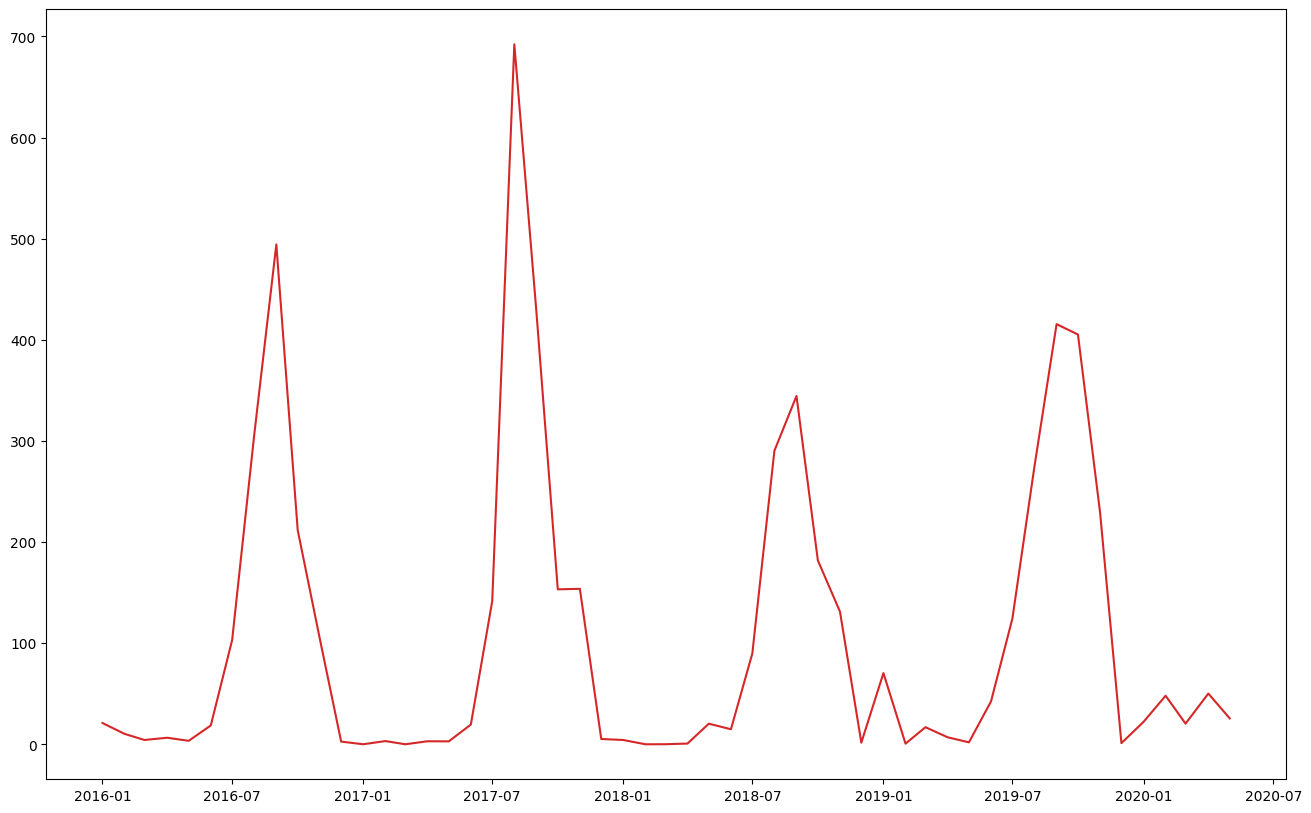

In [18]:
plt.figure(figsize = (16,10), dpi = 100)
plt.plot(rain_data.index, rain_data.Rainfall, color = "tab:red")

### Apply the Moving Average function by a subset of 30 days


<AxesSubplot: xlabel='date_time'>

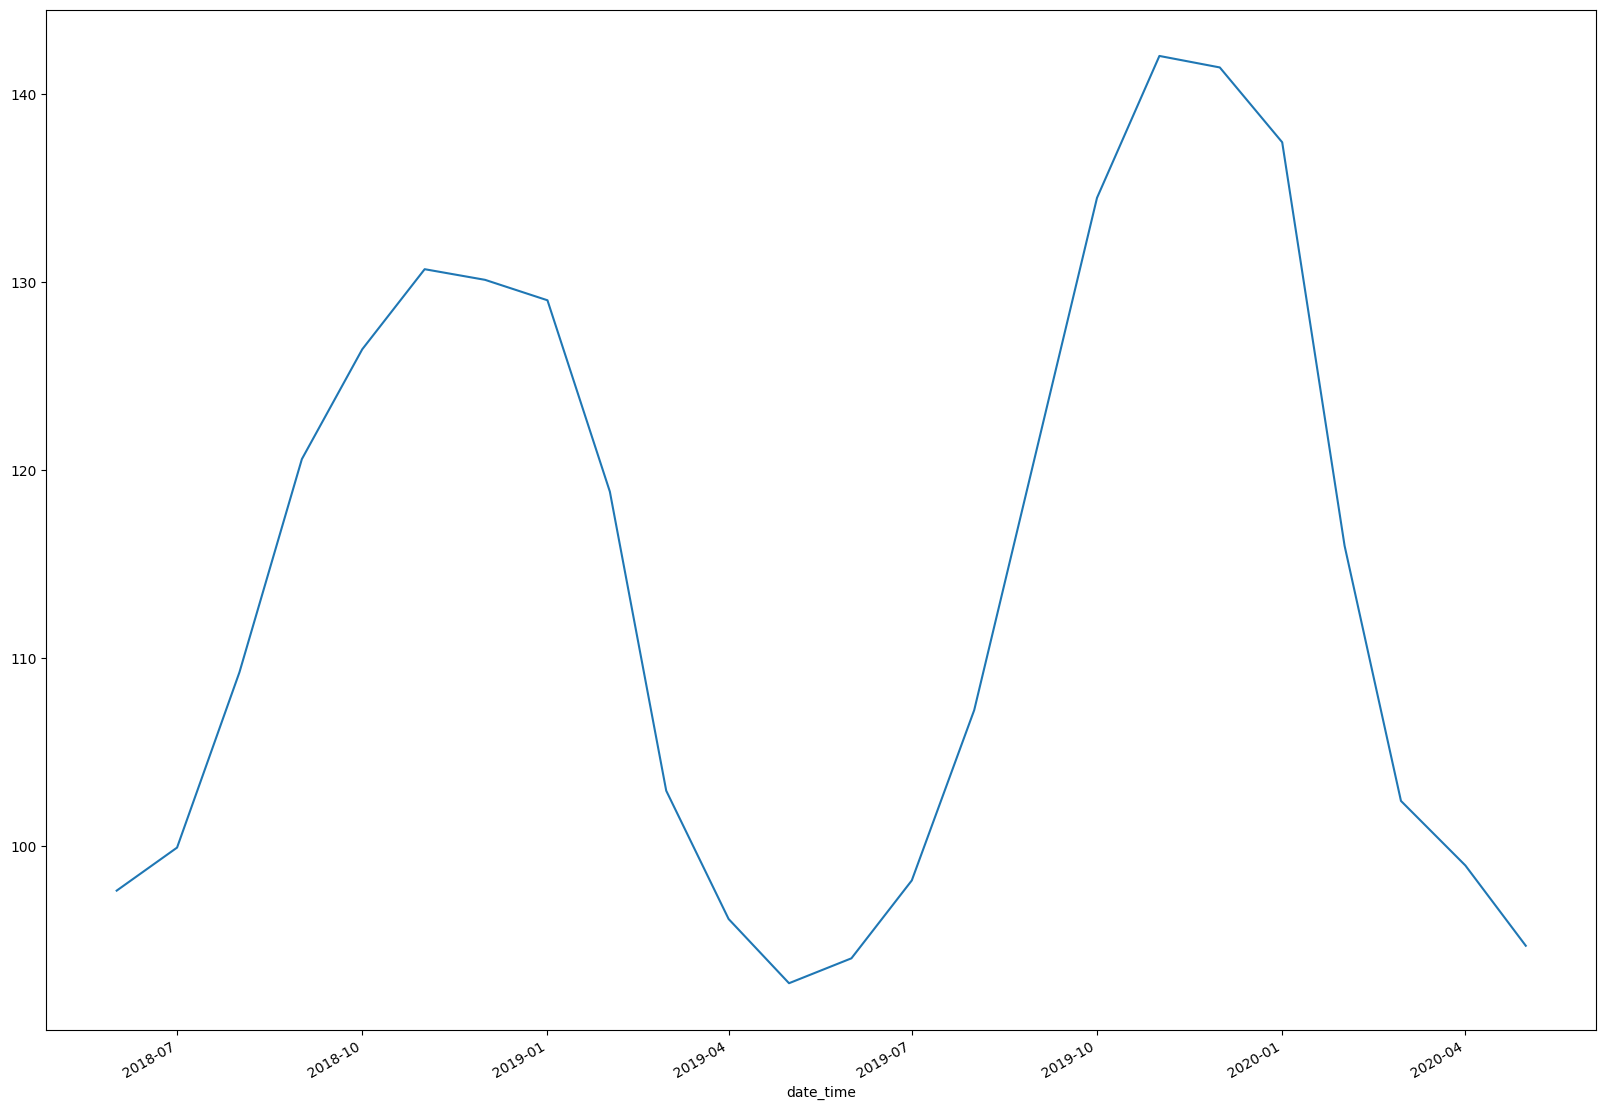

In [19]:
rain_data_mean = rain_data.Rainfall.rolling(window=30).mean()
rain_data_mean.plot(figsize = (20,15))


### Time series Decomposition

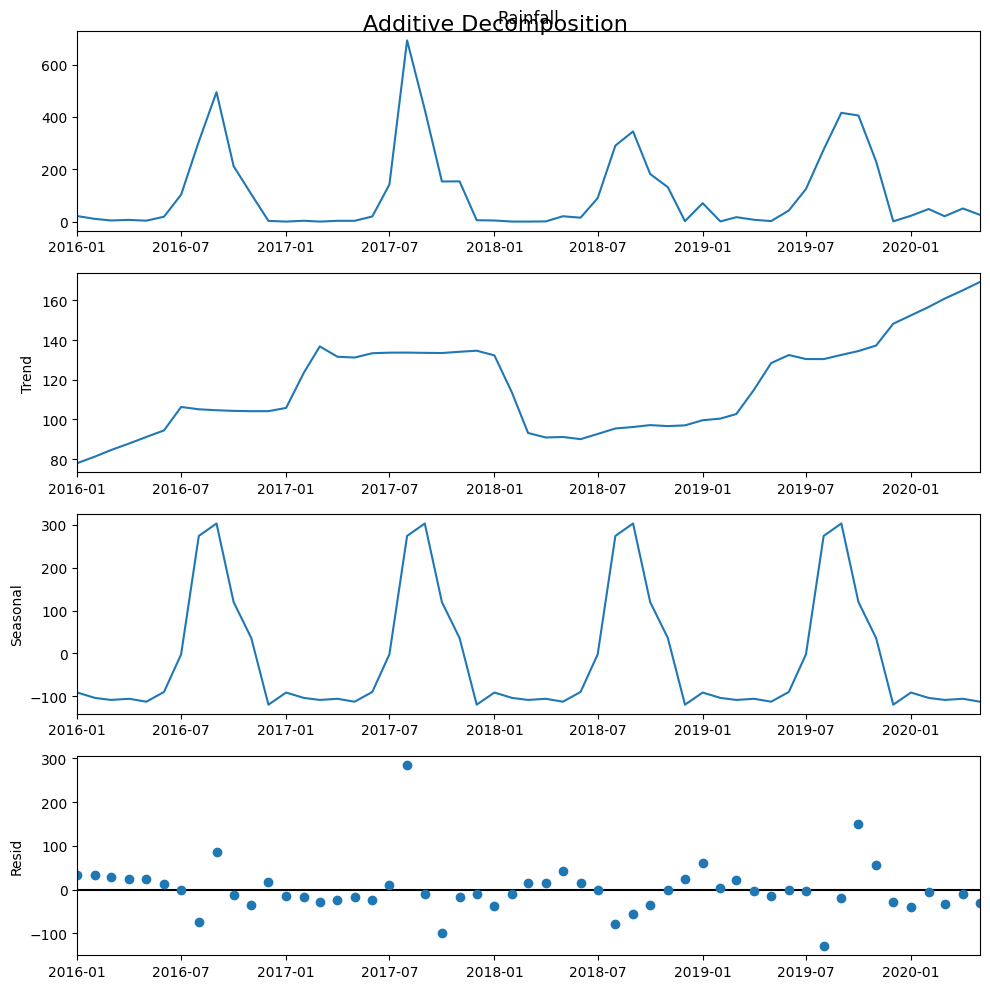

In [26]:
result_add = seasonal_decompose(rain_data["Rainfall"], model = 'additive', extrapolate_trend = 'freq', period = 12)
plt.rcParams.update({'figure.figsize' : (10, 10)})
result_add.plot().suptitle("Additive Decomposition", fontsize = 16)
plt.show()